In [2]:
import torch
import torch.nn as nn
import torchvision as tv
from torch.nn import functional as F

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

from tqdm import tqdm

In [3]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [20]:
ds_mnist = tv.datasets.MNIST('./datasets', download=True, transform=trans)

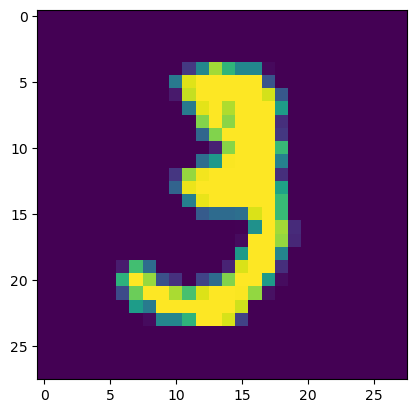

In [28]:
ds_mnist[0][0].numpy()[0].shape
plt.imshow(ds_mnist[10][0].numpy()[0])

In [4]:
train_df = pd.read_csv("Train data.csv")

In [7]:
train_df.drop(columns=["ID"], inplace=True)

In [8]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(
    train_df["title"], batch_size=batch_size, shuffle=True, 
    num_workers=1, drop_last=True
)

In [11]:
for img, label in dataloader:
    print(img.shape)
    print(label.shape)
    break

AttributeError: 'list' object has no attribute 'shape'

In [12]:
#Первый вариант
class Neural_numbers(nn.Module):
    def __init__(self):
        super().__init__()
        
        linear1 = nn.Linear(28*28, 100)
        linear2 = nn.Linear(100, 10)
        
        act = nn.ReLu()
        
        self.model = nn.Sequential(linear1, act, linear2)
    
    def forward(self, x):
        return self.model(x)

In [13]:
#Второй вариант
class Neural_numbers(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 100)
        self.linear2 = nn.Linear(100, 10)
        
        self.act = nn.ReLU()

    
    def forward(self, x):
        out = self.flat(x)
        out = self.linear1(out)
        out = self.act(out)
        out = self.linear2(out)
        
        return out

In [14]:
model = Neural_numbers()

In [15]:
def count_parametrs(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [16]:
count_parametrs(model)

79510

In [17]:
loss_fn = nn.CrossEntropyLoss()

In [18]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [19]:
def accuracy(pred, label):
    answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
    return answer.mean()

In [20]:
epochs = 10

for epoch in range(epochs):
    loss_val = 0
    acc_val = 0
    for img, label in (pbar := tqdm(dataloader)):
        optimizer.zero_grad()

        label = F.one_hot(label, 10).float()
        pred = model(img)

        loss = loss_fn(pred, label)

        loss.backward()
        loss_item = loss.item()
        loss_val += loss_item
        
        optimizer.step()
        
        acc_current = accuracy(pred, label)
        acc_val += acc_current
        
        pbar.set_description(f'loss: {loss_item:.5f}\accuracy: {acc_current:.3f}')
    print(loss_val/len(dataloader))
    print(acc_val/len(dataloader))

  0%|                                                  | 0/8456 [00:01<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [86]:
accuracy(pred, label)

/var/folders/m1/vm0jghd90kb7p91f__6czj900000gn/T/ipykernel_37420/1416373963.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)


1.0